In [59]:
import pandas as pd
airPollData = pd.read_csv('../data/VisData.csv')
airPollData.shape

(525, 29)

In [60]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# df = airPollData.sample(frac=0.25, replace=True, random_state=1)
df = airPollData
for col in df.columns.values:
    if df[col].dtype==object:
        df[col] = le.fit_transform(df[col])
df.head()

,State,County,Year,NO2_Units,NO2_Mean,NO2_1st_Max_Value,NO2_1st_Max_Hour,NO2_AQI,O3_Units,O3_Mean,...,CO_Mean,CO_1st_Max_Value,CO_1st_Max_Hour,CO_AQI,YPLL Rate,% Fair/Poor,Physically Unhealthy Days,TotalPop,TotalMalePop,TotalFemalePop
0,2,66,2010,0,12.09,27.02,14,25.29,0,0.03,...,0.25,0.46,8,2.09,8019,14,3.6,981653,499499,482154
1,2,66,2011,0,11.78,25.56,12,23.66,0,0.03,...,0.19,0.33,6,1.50,7699,14,3.7,988407,502199,486208
2,2,66,2012,0,13.39,28.19,14,26.15,0,0.03,...,0.21,0.37,7,1.69,7721,15,3.7,993215,504528,488687
3,2,66,2013,0,11.00,23.93,12,22.14,0,0.03,...,0.17,0.31,6,1.41,11848,17,3.9,997437,506602,490835
4,2,66,2014,0,11.35,24.22,13,22.40,0,0.03,...,0.21,0.35,6,1.63,7390,14,3.7,1004675,509783,494892


In [61]:
on = preprocessing.OneHotEncoder()
df2 = pd.read_csv('../data/VisData.csv')
df2 = df2.drop(['State', 'County', 'NO2_Units', 'O3_Units', 'SO2_Units', 'CO_Units'], axis=1)
for col in ['O3_Mean', 'O3_1st_Max_Value', 'CO_Mean', 'CO_1st_Max_Value']:
    df2[col] = df2[col].apply(lambda x: x*1000)
for col in ['NO2_1st_Max_Hour', 'O3_1st_Max_Hour', 'SO2_1st_Max_Hour', 'CO_1st_Max_Hour']:
    df2[col] = df2[col].apply(lambda x: int(x/8)+1)
df2['Year'] = df2['Year'].apply(lambda x: x%3)
# df2
cats = ['Year', 'NO2_1st_Max_Hour', 'O3_1st_Max_Hour', 'SO2_1st_Max_Hour', 'CO_1st_Max_Hour']
for col in cats:
    df2[col] = df2[col].astype(object)
# for col in df2.columns.values:
#     if col in cats:
#         # print(col, df2[col].dtype)
#         continue
#     else:
#         print(col)
df2 = pd.concat([df2,pd.get_dummies(df2[cats])],axis=1)
df2 = df2.drop(cats, axis=1)
# for i in df2.dtypes:
#     print(i)

(525, 29)


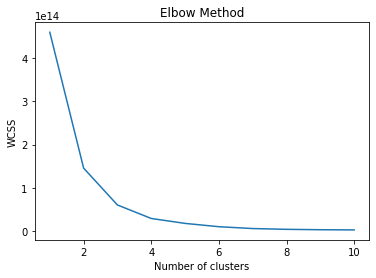

In [62]:
df = df2
print(df.shape)
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

(4, 29)


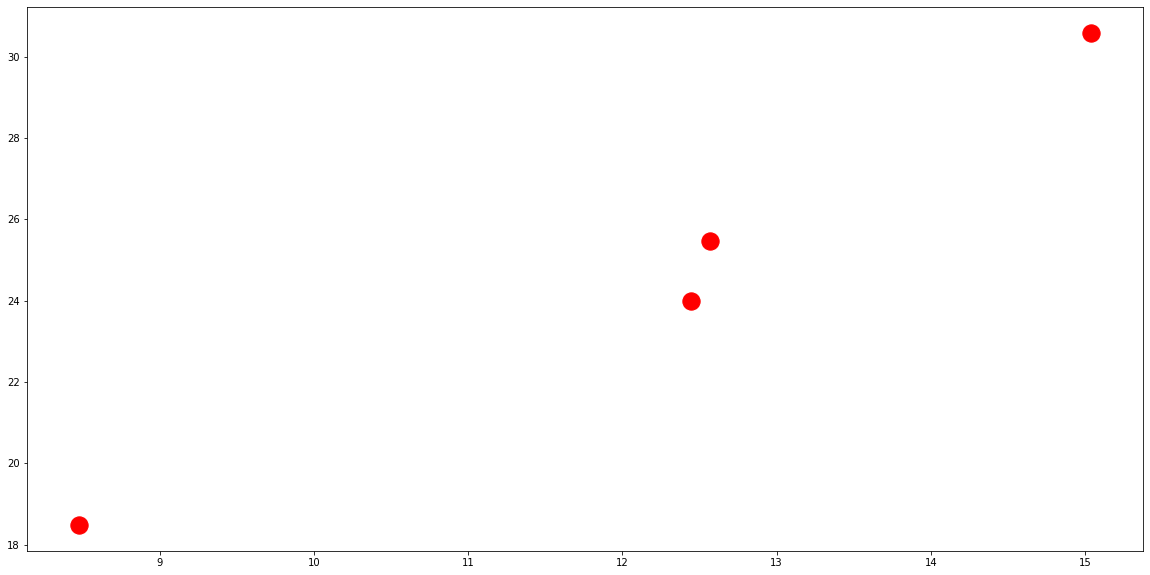

30

In [63]:
no_of_clusters = 4
kmeans = KMeans(n_clusters=no_of_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(df)
df['Cluster'] = pred_y
print(kmeans.cluster_centers_.shape)
plt.figure(figsize=(20,10))
# plt.scatter(np.array(df.iloc[:,0]), np.array(df.iloc[:,1]), s=30, c='blue')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')

# plt.
plt.show()

column_list = list(df.columns.values)
len(column_list)

8 0.7734569345351089


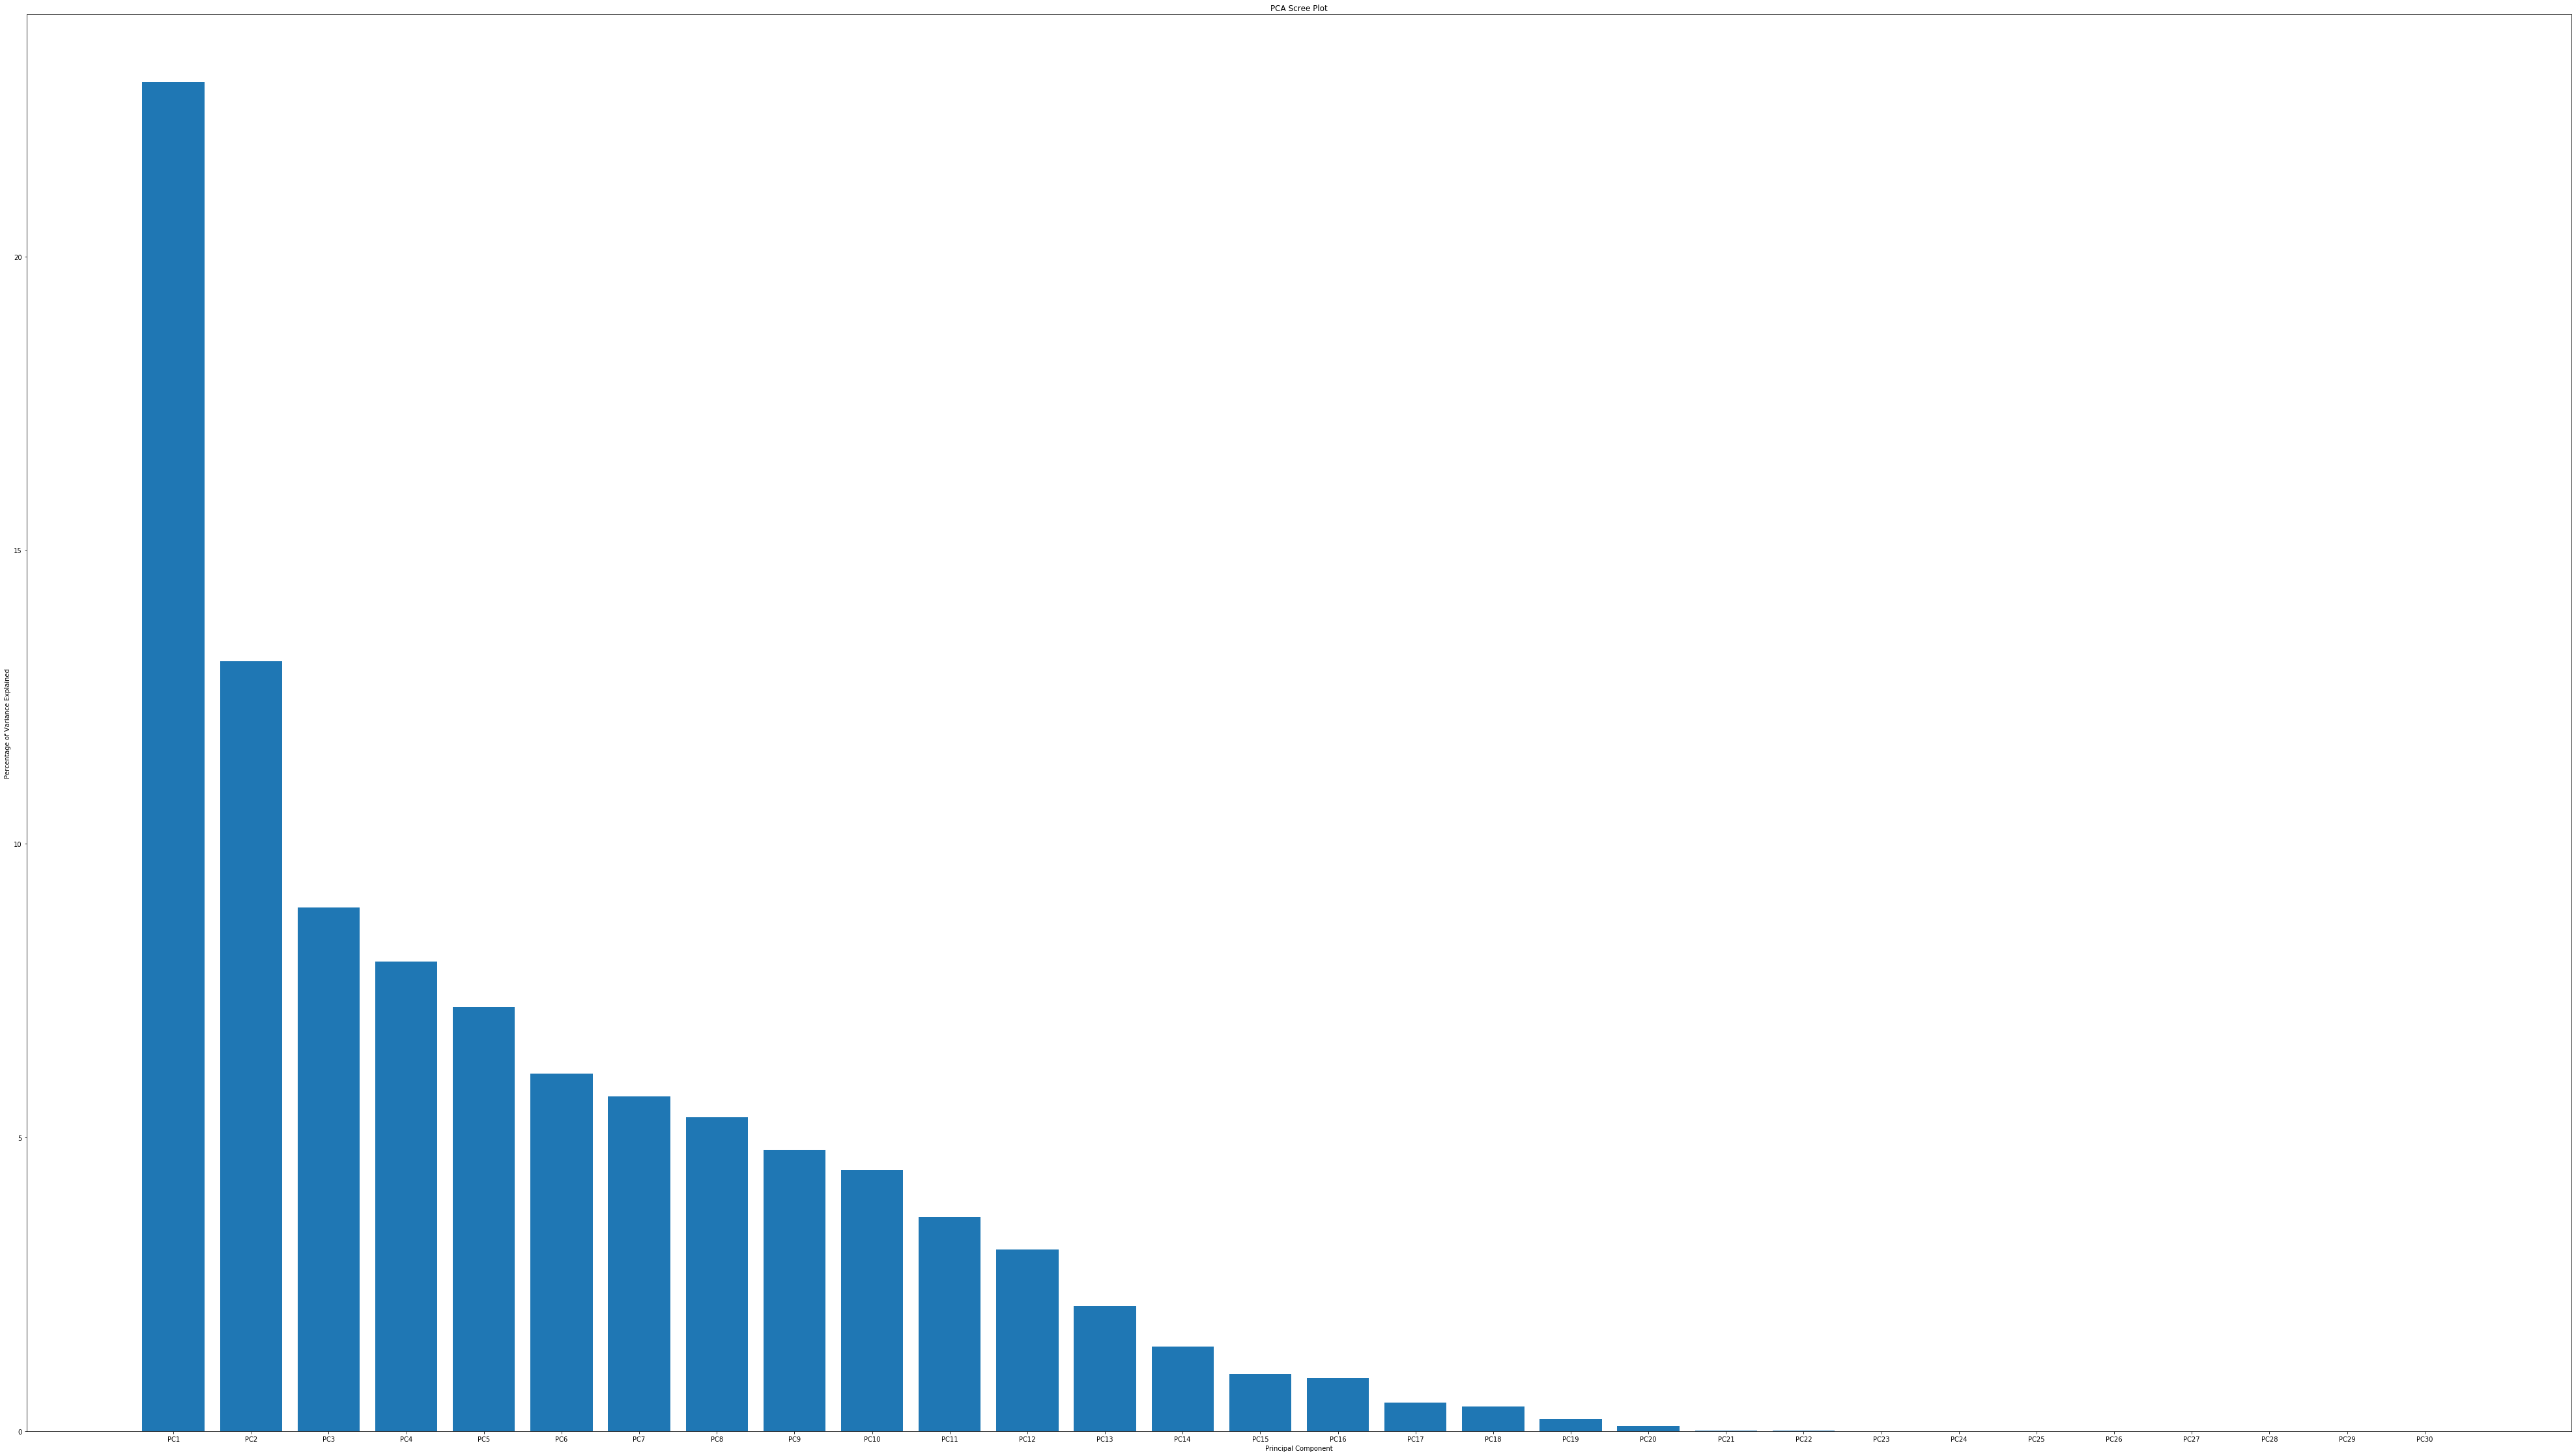

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=len(column_list))
x = StandardScaler().fit_transform(df)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
# print(sum(pca.explained_variance_ratio_[:6]))
# 
for p in range(len(list(pca.explained_variance_ratio_))):
    if sum(pca.explained_variance_ratio_[:p]) >= 0.75:
        print(p, sum(pca.explained_variance_ratio_[:p]))
        break

columns = ['PC'+str(x) for x in range(1, len(column_list)+1)]
plt.figure(figsize=(70,40))
plt.bar(x= range(1, len(column_list)+1), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

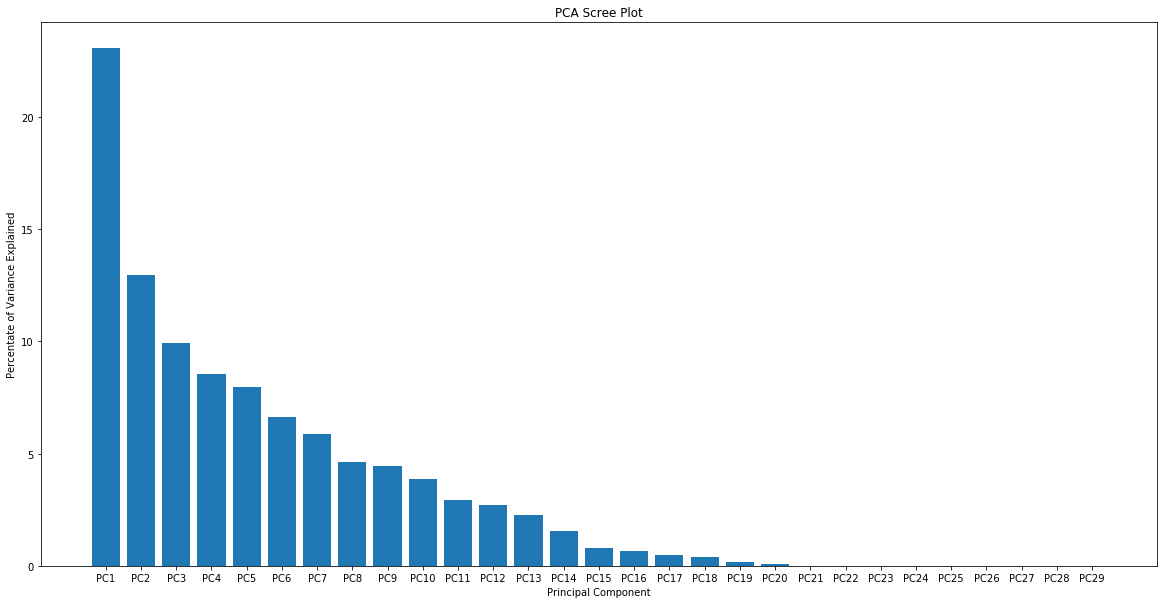

In [65]:
randomSampled = df.sample(frac=0.30, replace=True, random_state=1)
pca = PCA(n_components=29)
x = StandardScaler().fit_transform(randomSampled)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC'+str(x) for x in range(1, 30)]
plt.figure(figsize=(20,10))
plt.bar(x= range(1,30), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

(525, 30)
(156, 30)


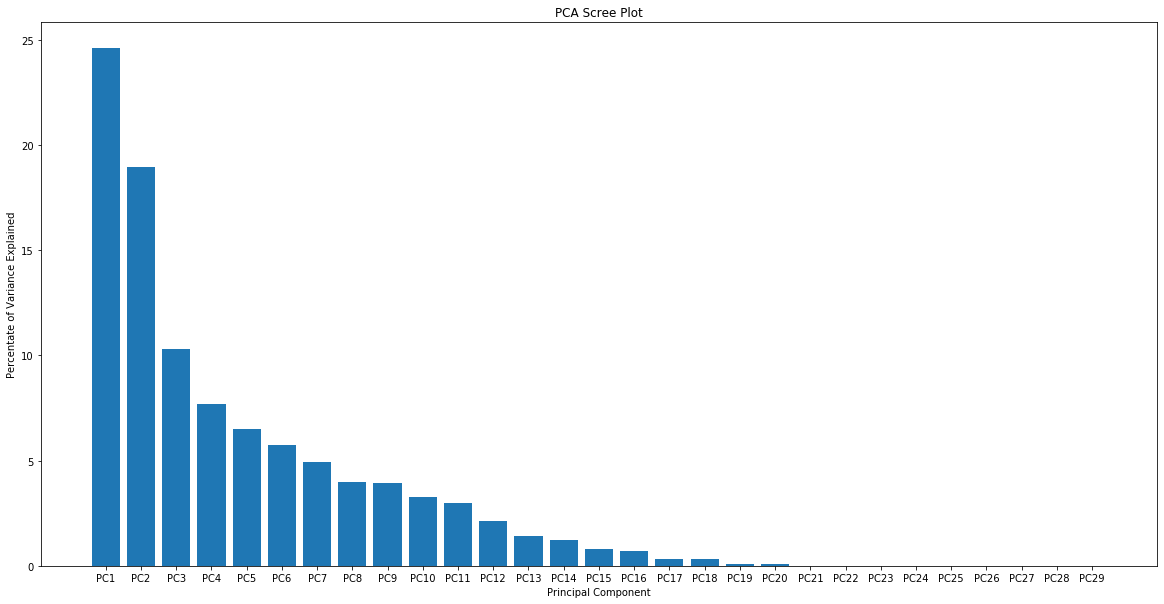

0.24595759968918743

In [66]:
#Bigger clusters should get more samples
needed_len = int(df.shape[0]*0.30)
print(df.shape)
points_from_one_cluster = int(needed_len/no_of_clusters)
firstDf = df[df['Cluster']==0].sample(n=points_from_one_cluster, replace=True, random_state=1)
for i in range(1, no_of_clusters):
    firstDf = pd.concat([firstDf, df[df['Cluster']==i].sample(n=points_from_one_cluster, replace=True, random_state=1)], ignore_index=True)

pca = PCA(n_components=29)
print(firstDf.shape)
x = StandardScaler().fit_transform(firstDf)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC'+str(x) for x in range(1, 30)]
plt.figure(figsize=(20,10))
plt.bar(x= range(1,30), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()
sum(pca.explained_variance_ratio_[:1])

In [67]:
for i in range(1,30):
    if sum(pca.explained_variance_ratio_[:i]) >= 0.75:
        print(i, sum(pca.explained_variance_ratio_[:i]))
        break
for i in range(len(pca.components_[:6])):
    for j in range(len(pca.components_[0])):
        print(round(pca.components_[i][j], 4), end='\t\t')
    print()

7 0.787682115108667
0.3399		0.3445		0.3444		-0.1612		-0.0114		-0.0061		0.1373		0.1502		0.1468		0.3065		0.3261		0.3263		0.0148		0.0581		-0.0172		0.1293		0.1293		0.1292		0.0664		-0.0159		-0.0519		-0.1323		-0.0091		0.145		-0.0		-0.162		0.162		-0.2202		0.2202		0.0419		
-0.0469		-0.0584		-0.0582		-0.1818		-0.2042		-0.206		0.2662		0.2872		0.2805		-0.0348		-0.1083		-0.089		0.2117		0.1083		0.1995		-0.3558		-0.3554		-0.3561		0.0917		0.0267		-0.1176		-0.039		0.084		-0.0783		0.0		-0.197		0.197		-0.1014		0.1014		-0.0954		
-0.0268		-0.0768		-0.0776		-0.2926		-0.3739		-0.3863		0.0079		0.0005		0.006		0.106		0.0909		0.0925		-0.1044		-0.0274		0.0237		0.0953		0.0962		0.0943		0.2934		-0.0687		-0.231		0.2026		-0.297		0.2119		0.0		0.1732		-0.1732		0.2048		-0.2048		-0.2879		
0.0306		0.0121		0.0117		-0.0474		-0.1931		-0.2216		0.0946		0.0836		0.0784		-0.037		-0.0568		-0.06		-0.4045		-0.4298		-0.4402		0.0473		0.048		0.0467		-0.0923		0.2284		-0.1221		-0.2217		0.3352		-0.2461		-0.0		-0.1049		0.1049		0.0745		-0.0